In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gc


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# load the data
df_original = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv',nrows=100000)

In [6]:
# sample 10000 instances of the data
df = df_original#.sample(n = 50000)
print("the shape of the data ",df.shape)
df.head()

the shape of the data  (100000, 54)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [7]:
# Check for missing values
df.isnull().sum(axis = 0)

srch_id                            0
date_time                          0
site_id                            0
visitor_location_country_id        0
visitor_hist_starrating        94561
visitor_hist_adr_usd           94542
prop_country_id                    0
prop_id                            0
prop_starrating                    0
prop_review_score                141
prop_brand_bool                    0
prop_location_score1               0
prop_location_score2           21728
prop_log_historical_price          0
position                           0
price_usd                          0
promotion_flag                     0
srch_destination_id                0
srch_length_of_stay                0
srch_booking_window                0
srch_adults_count                  0
srch_children_count                0
srch_room_count                    0
srch_saturday_night_bool           0
srch_query_affinity_score      93674
orig_destination_distance      32092
random_bool                        0
c

<AxesSubplot:>

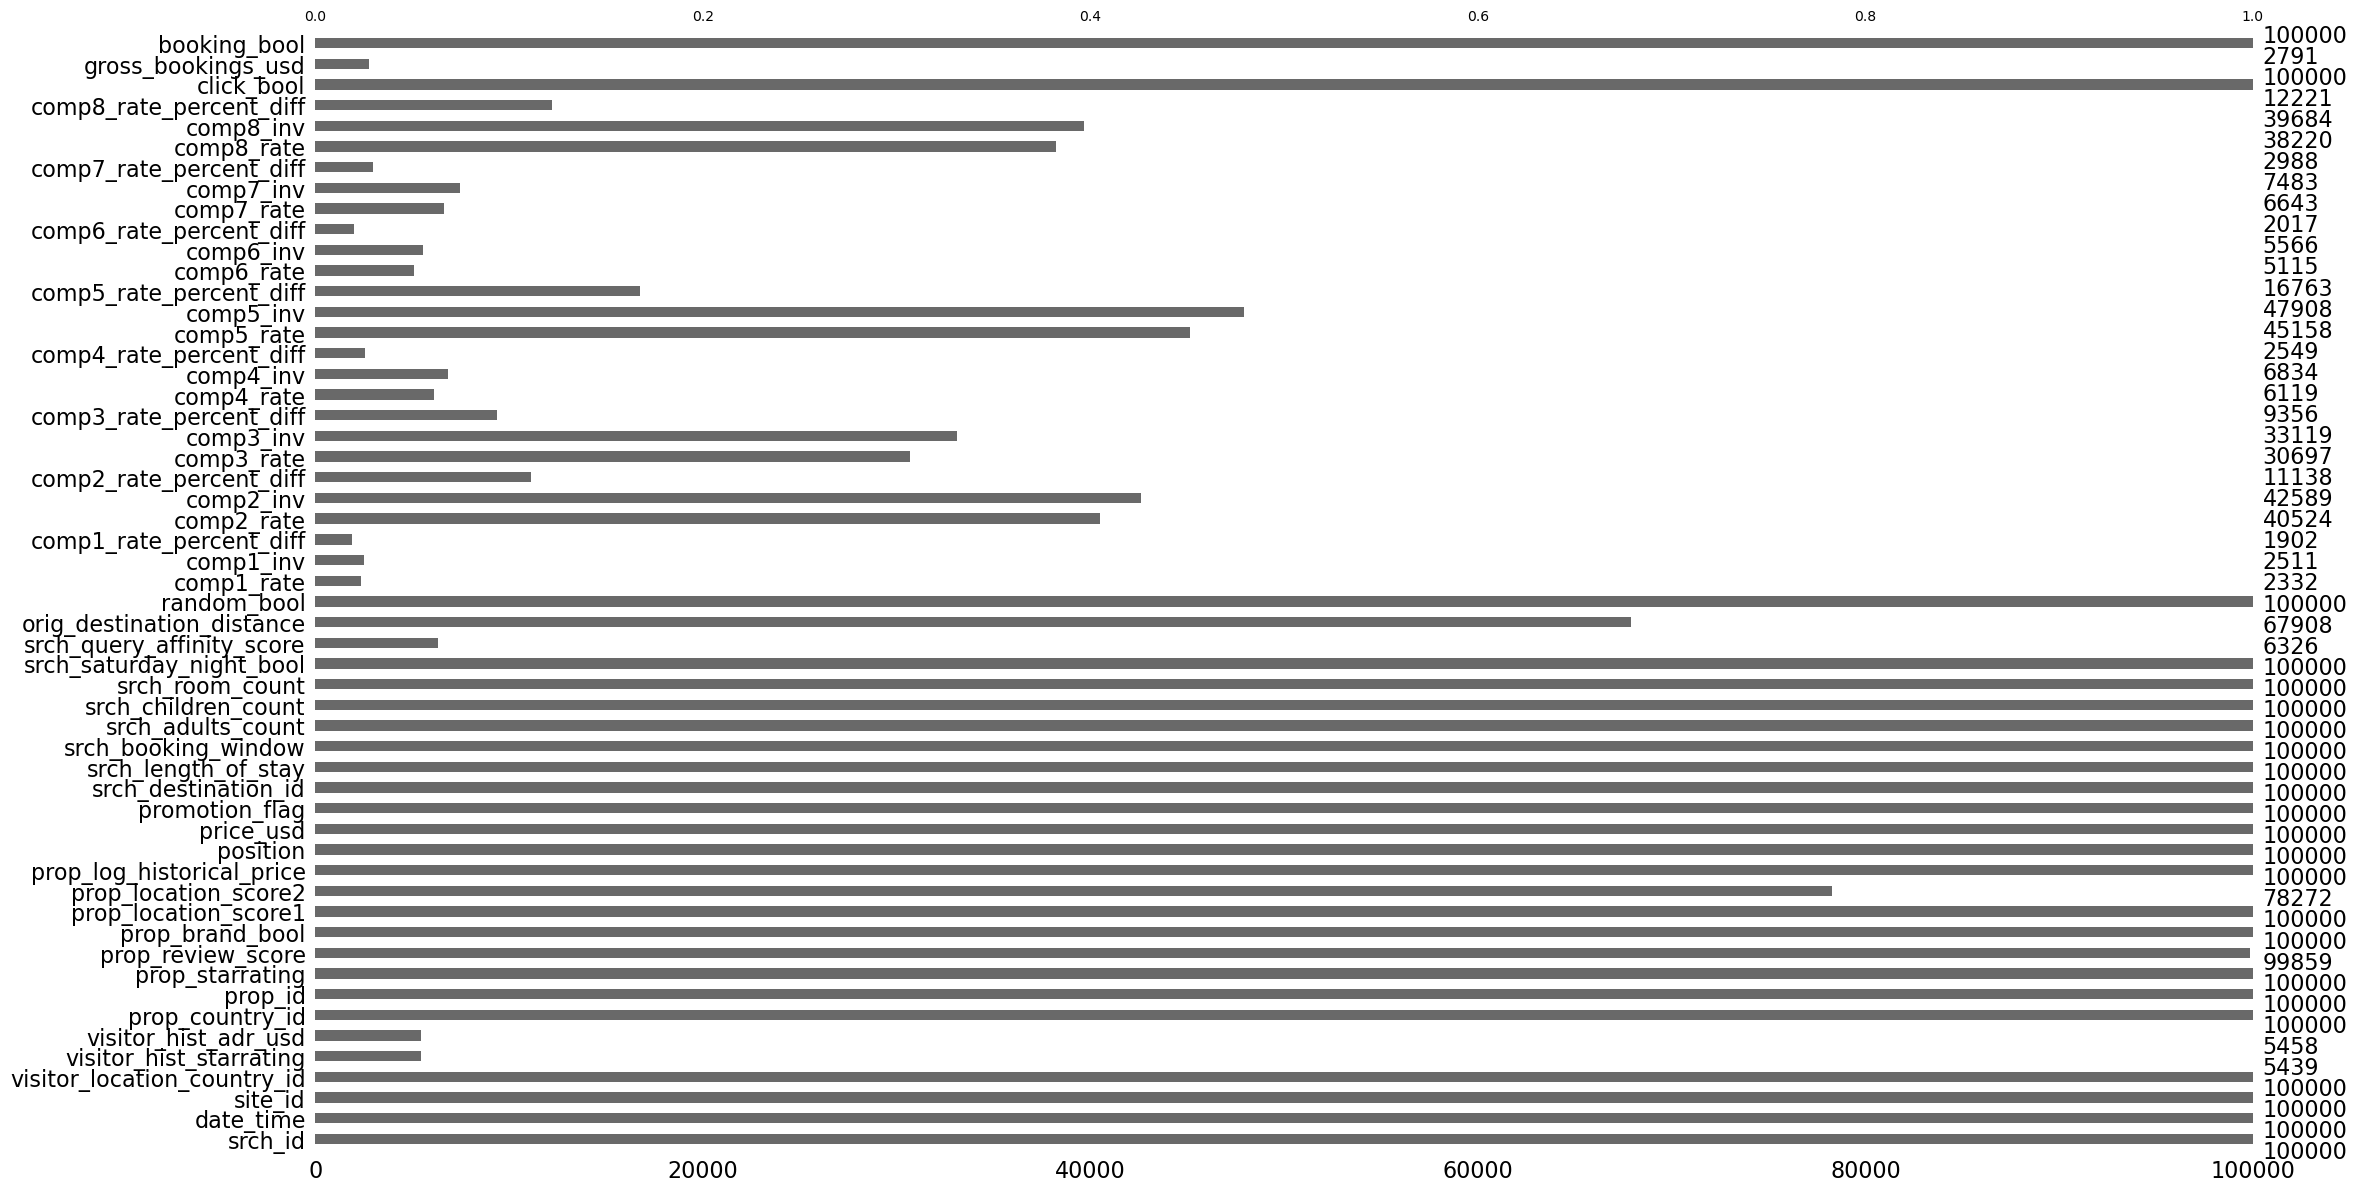

In [8]:
import missingno as msno
# visualize the missing values
msno.bar(df)

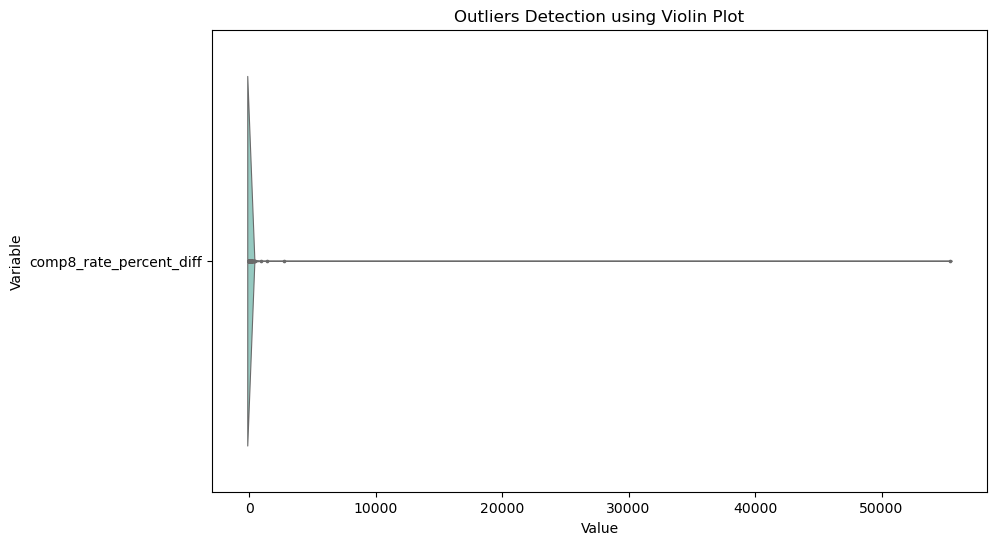

In [9]:
# Select the numeric columns for outlier detection
features = [
            'comp8_rate_percent_diff',
            ]


# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[features], inner="points", linewidth=0.8, scale="width", palette="Set3", orient='h')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Outliers Detection using Violin Plot')

# Show the plot
plt.show()

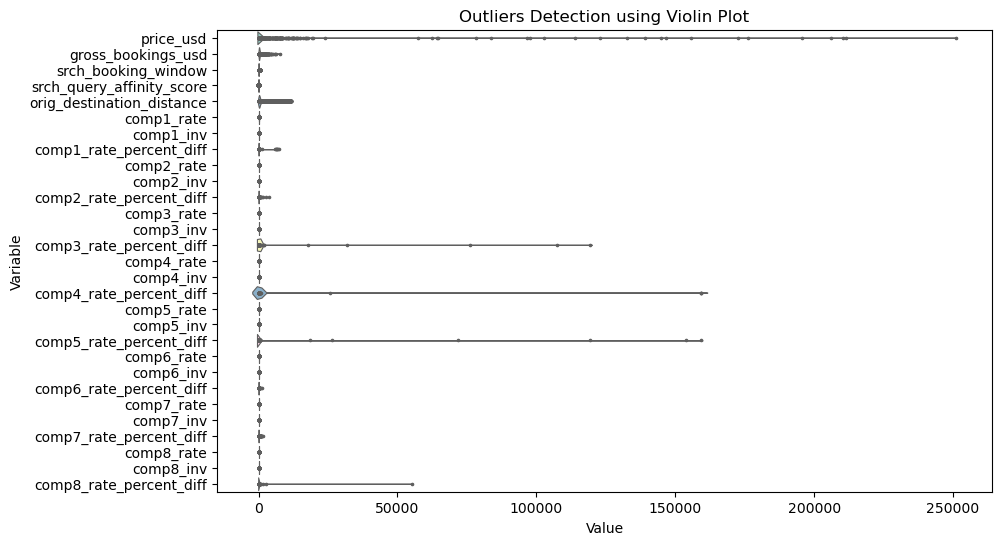

In [10]:
# Select the numeric columns for outlier detection
features = [
            'price_usd','gross_bookings_usd',
            'srch_booking_window', 'srch_query_affinity_score', 'orig_destination_distance',
            'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff',
            'comp2_rate', 'comp2_inv','comp2_rate_percent_diff',
            'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff',
            'comp4_rate','comp4_inv', 'comp4_rate_percent_diff',
            'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff',
            'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 
            'comp7_rate', 'comp7_inv','comp7_rate_percent_diff', 
            'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff',
            ]


# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[features], inner="points", linewidth=0.8, scale="width", palette="Set3", orient='h')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Outliers Detection using Violin Plot')

# Show the plot
plt.show()

In [11]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,100000.000000,100000.000000,100000.000000,5439.000000,5458.000000,100000.000000,100000.000000,100000.000000,99859.000000,100000.000000,100000.000000,78272.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,6326.000000,67908.000000,100000.000000,2332.000000,2511.000000,1902.000000,40524.00000,42589.000000,11138.000000,30697.000000,33119.000000,9356.000000,6119.000000,6834.000000,2549.000000,45158.000000,47908.000000,16763.000000,5115.000000,5566.000000,2017.000000,6643.000000,7483.000000,2988.000000,38220.000000,39684.000000,12221.000000,100000.00000,2791.000000,100000.000000
mean,3349.408100,9.849650,175.320660,3.435301,187.995529,173.345440,70175.262040,3.199270,3.805270,0.642240,2.893170,0.131351,4.344676,16.836230,197.634135,0.212200,13951.074590,2.371430,38.466060,1.971930,0.343650,1.104290,0.500410,-23.747603,1310.836929,0.301060,0.521870,0.029869,38.157729,0.05039,0.039940,18.139881,0.017982,0.054621,54.355494,-0.009969,0.100966,217.882307,0.025643,0.046777,50.870847,0.127859,0.075997,17.877541,0.147524,0.082186,22.012048,-0.057980,0.008996,19.407659,0.04487,387.943823,0.027910
std,1926.760422,7.602748,66.498956,0.655287,101.652307,69.104023,40616.723395,1.048328,1.018002,0.479343,1.537537,0.160555,1.831244,10.434199,2220.799792,0.408868,8219.565078,2.048075,52.539008,0.871556,0.713526,0.378755,0.500002,14.649770,2025.864433,0.458721,0.636339,0.229983,395.245874,0.44822,0.232849,52.840362,0.455402,0.292228,1875.953602,0.559969,0.337069,5483.919018,0.519528,0.261906,2034.451131,0.562896,0.308273,41.138177,0.587359,0.314587,66.539802,0.470193,0.205865,502.099953,0.20702,536.808535,0.164716
min,1.000000,1.000000,2.000000,1.670000,36.910000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.240000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-120.290300,0.010000,0.000000,-1.000000,-1.000000,2.000000,-1.00000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.00000,5.450000,0.000000
25%,1683.000000,5.000000,100.000000,3.000000,122.600000,100.000000,35082.500000,3.000000,3.500000,0.000000,1.790000,0.019200,4.470000,8.000000,87.000000,0.000000,6874.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,-30.691325,145.435000,0.000000,0.000000,0.000000,8.000000,0.00000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.00000,122.740000,0.000000
50%,3314.000000,5.000000,219.000000,3.500000,168.250000,219.000000,69730.000000,3.000000,4.000000,1.000000,2.830000,0.069200,4.940000,16.000000,125.300000,0.000000,13292.000000,2.000000,18.000000,2.000000,0.000000,1.000000,1.000000,-19.676000,382.485000,0.000000,1.000000,0.000000,10.000000,0.00000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.00000

In [12]:
# how many unique user
print(f"Check How many unique user \n{len(df['srch_id'].unique())}\n")

# how many unique prop_id
print(f"Check How many unique prop_id \n{len(df['prop_id'].unique())}\n")

# Full rating matrix will have
print(f"Full rating matrix will have \n{len(df['prop_id'].unique())*len(df['prop_id'].unique())} elements \n")

# TODO check the number of sparsity in the data 

# Check the distribution of the booking_bool variable
print(f"Check the distribution of the booking_bool variable \n{df['booking_bool'].value_counts()}\n")

# Check the distribution of the click_bool variable
print(f"Check the distribution of the click_bool variable \n{df['click_bool'].value_counts()}\n")

# Check the distribution of the visitor_location_country_id 
print(f"Check the distribution of the visitor_location_country_id \n{df['visitor_location_country_id'].value_counts().head()}\n")

# Check the distribution of the visitor_hist_starrating 
print(f"Check the distribution of the visitor_hist_starrating \n{df['visitor_hist_starrating'].value_counts().head()}\n")

# average visitor_hist_starrating for each srch_id
print(f"average visitor_hist_starrating for each srch_id \n{df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna().head()}\n")

# average visitor_location_country_id for each srch_id
print(f"average visitor_location_country_id for each srch_id \n{df.groupby('srch_id')['visitor_location_country_id'].mean().dropna().head()}\n")


Check How many unique user 
4046

Check How many unique prop_id 
41656

Full rating matrix will have 
1735222336 elements 

Check the distribution of the booking_bool variable 
0    97209
1     2791
Name: booking_bool, dtype: int64

Check the distribution of the click_bool variable 
0    95513
1     4487
Name: click_bool, dtype: int64

Check the distribution of the visitor_location_country_id 
219    58560
100     9819
55      5885
216     4498
220     3617
Name: visitor_location_country_id, dtype: int64

Check the distribution of the visitor_hist_starrating 
4.0    557
3.0    426
3.5    366
2.5    206
2.0    145
Name: visitor_hist_starrating, dtype: int64

average visitor_hist_starrating for each srch_id 
srch_id
47     4.31
49     2.50
80     2.50
87     3.74
108    3.35
Name: visitor_hist_starrating, dtype: float64

average visitor_location_country_id for each srch_id 
srch_id
1     187.0
4     219.0
6     100.0
8     219.0
11    219.0
Name: visitor_location_country_id, dtype: float

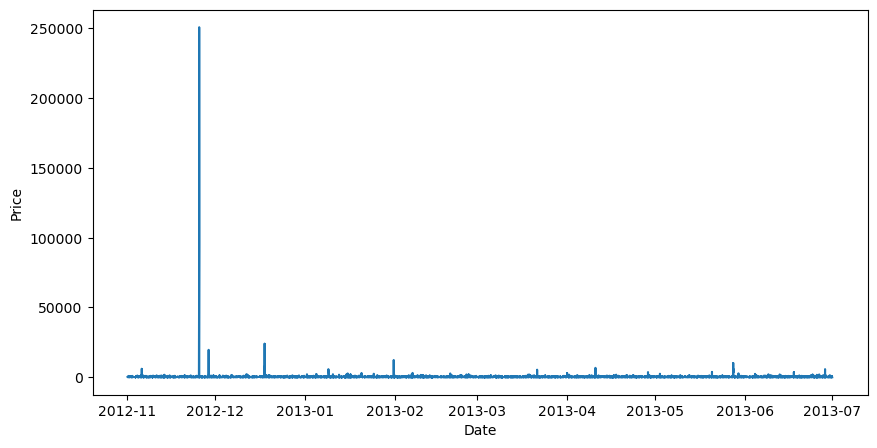

In [13]:
# Assuming you have already loaded the data into a DataFrame called 'df'
df['date_time'] = pd.to_datetime(df['date_time'])  # Convert 'date_time' column to datetime format
df_sorted = df.sort_values('date_time')  # Sort the DataFrame based on 'date_time'

# Plotting the sorted data
plt.figure(figsize=(10,5))
plt.plot(df_sorted['date_time'], df_sorted['price_usd'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [14]:
# # Visualize the distribution of numerical features
# num_features = ['booking_bool','visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_starrating', 
#                 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 
#                 'prop_log_historical_price', 'position', 'price_usd',
#                 'srch_query_affinity_score', 'orig_destination_distance',
#                 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 
#                 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 
#                 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate',
#                 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 
#                 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 
#                 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 
#                 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
#                 'comp8_rate_percent_diff']

# fig, axes = plt.subplots(9, 4, figsize=(20, 30))
# axes = axes.flatten()

# for i, feature in enumerate(num_features):
#     sns.histplot(df[feature], kde=False, ax=axes[i])
#     axes[i].set_title(feature)

# plt.tight_layout()
# plt.show()

In [15]:
a = df[df['click_bool'] == 0]
b = df[df['click_bool'] == 1]

aa = a[a['booking_bool'] == 0]
aa1 = a[a['booking_bool'] == 1]

bb = b[b['booking_bool'] == 0]
bb1 = b[b['booking_bool'] == 1]

In [16]:
click_bool_1 = df[df['click_bool'] == 1]
click_bool_0 = df[df['click_bool'] == 0]

# spilt the data +1 when the displayed sort was random, 0 when the normal sort order was displayed
display_order = click_bool_1[click_bool_1['random_bool'] == 0]
display_random = click_bool_1[click_bool_1['random_bool'] == 1]

# spilt the data if a property is part of a brand or not  
brand_display_order = display_order[display_order['prop_brand_bool'] == 1]
not_brand_display_order = display_order[display_order['prop_brand_bool'] == 0]

brand_display_random = display_random[display_random['prop_brand_bool'] == 1]
not_brand_display_random = display_random[display_random['prop_brand_bool'] == 0]

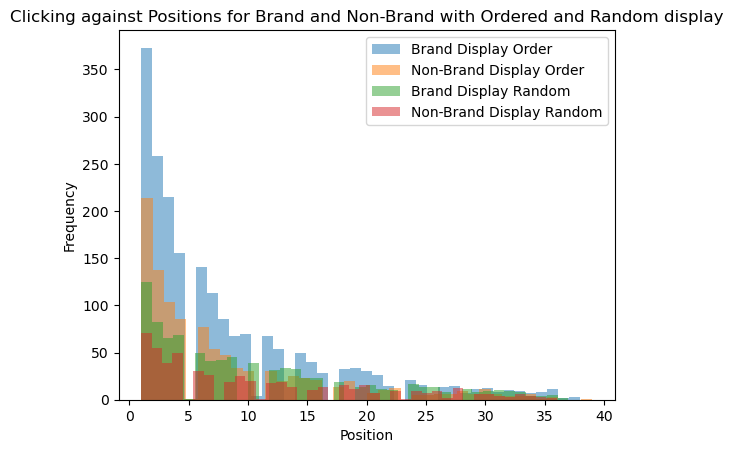

In [17]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['position'], bins=40, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['position'], bins=40, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['position'], bins=40, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['position'], bins=40, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend()
plt.title('Clicking against Positions for Brand and Non-Brand with Ordered and Random display')

# Show the plot
plt.show()

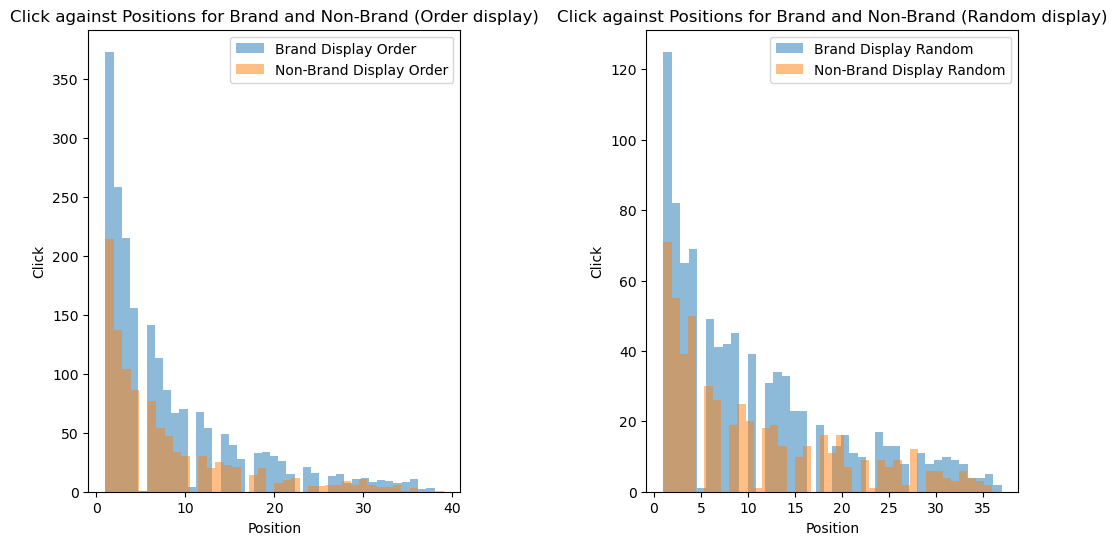

In [18]:
import matplotlib.pyplot as plt

# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'], bins=bins, label='Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'], bins=bins, label='Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click against Positions for Brand and Non-Brand (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'], bins=bins, label='Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'], bins=bins, label='Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click against Positions for Brand and Non-Brand (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


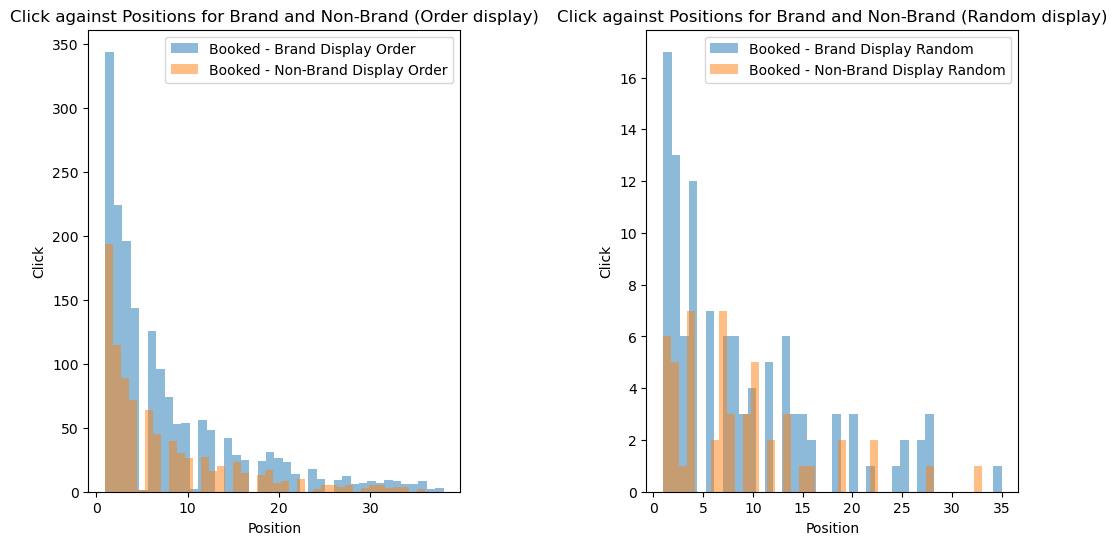

In [19]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click against Positions for Brand and Non-Brand (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click against Positions for Brand and Non-Brand (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()



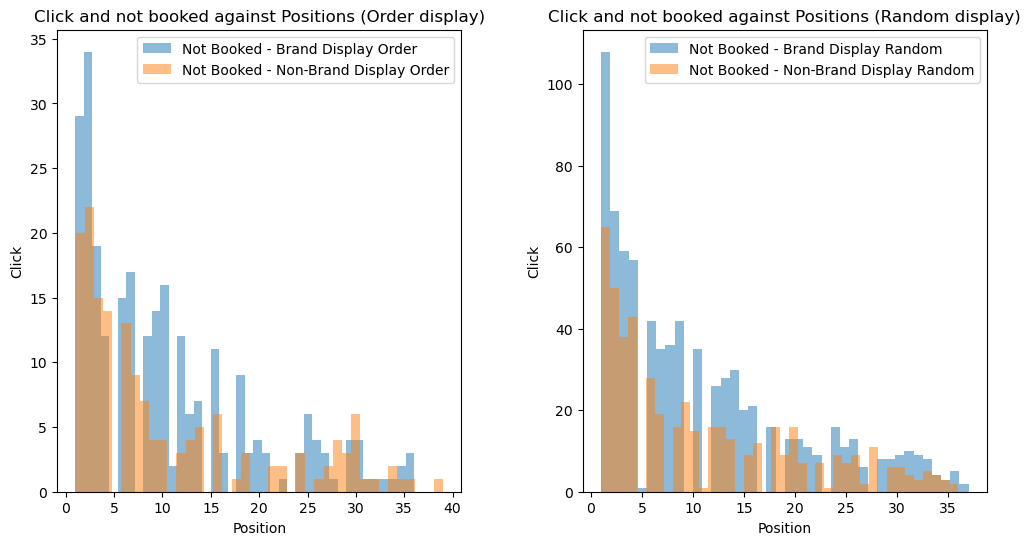

In [20]:
import matplotlib.pyplot as plt

# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click and not booked against Positions (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click and not booked against Positions (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


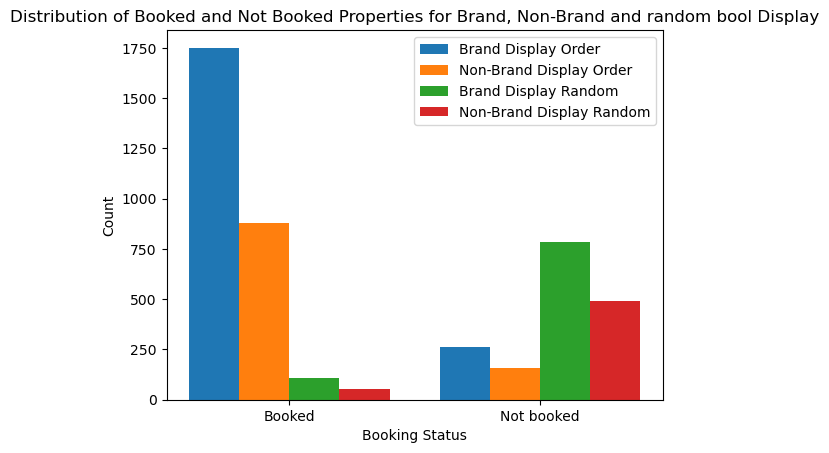

In [21]:
# Count the number of booked and not booked properties for each category
brand_display_order_counts = brand_display_order['booking_bool'].value_counts()
not_brand_display_order_counts = not_brand_display_order['booking_bool'].value_counts()
brand_display_random_counts = brand_display_random['booking_bool'].value_counts()
not_brand_display_random_counts = not_brand_display_random['booking_bool'].value_counts()

# Define the x positions for the bars
bar_width = 0.2
index = np.arange(2)

# Create a bar plot
plt.bar(index, [brand_display_order_counts[1], brand_display_order_counts[0]],width=bar_width, label='Brand Display Order')
plt.bar(index + bar_width, [not_brand_display_order_counts[1], not_brand_display_order_counts[0]],width=bar_width, label='Non-Brand Display Order')
plt.bar(index +2* bar_width,[brand_display_random_counts[1], brand_display_random_counts[0]],width=bar_width, label='Brand Display Random')
plt.bar(index +3* bar_width,[not_brand_display_random_counts[1], not_brand_display_random_counts[0]],width=bar_width, label='Non-Brand Display Random')

# Customize the plot
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(index + 1.5 * bar_width, ['Booked','Not booked'])
plt.legend()
plt.title('Distribution of Booked and Not Booked Properties for Brand, Non-Brand and random bool Display')
# Show the plot
plt.show()

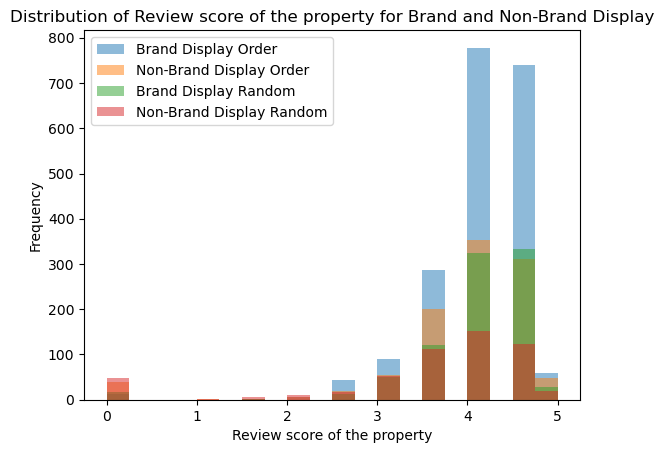

In [22]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['prop_review_score'], bins=20, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['prop_review_score'], bins=20, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['prop_review_score'], bins=20, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['prop_review_score'], bins=20, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Review score of the property')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Review score of the property for Brand and Non-Brand Display')

# Show the plot
plt.show()

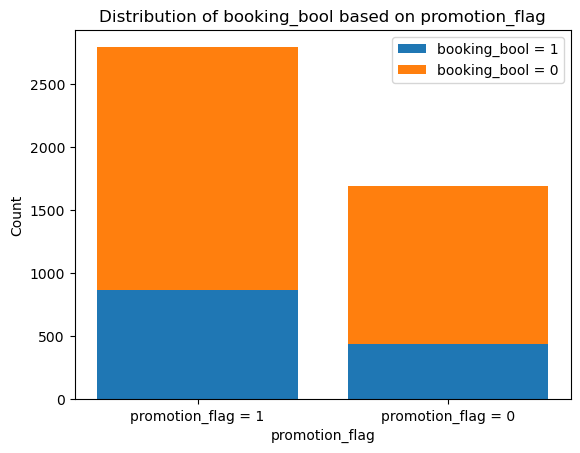

In [23]:
promotion_flag_1 = click_bool_1[click_bool_1['promotion_flag'] == 1]
promotion_flag_0 = click_bool_1[click_bool_1['promotion_flag'] == 0]

promotion_flag_1_book_bool_1 = promotion_flag_1[promotion_flag_1['booking_bool'] == 1]
promotion_flag_1_book_bool_0 = promotion_flag_1[promotion_flag_1['booking_bool'] == 0]

promotion_flag_0_book_bool_1 = promotion_flag_0[promotion_flag_0['booking_bool'] == 1]
promotion_flag_0_book_bool_0 = promotion_flag_0[promotion_flag_0['booking_bool'] == 0]


# Count the occurrences of each value combination
promotion_flag_1_book_bool_1_count = promotion_flag_1_book_bool_1.shape[0]
promotion_flag_1_book_bool_0_count = promotion_flag_1_book_bool_0.shape[0]
promotion_flag_0_book_bool_1_count = promotion_flag_0_book_bool_1.shape[0]
promotion_flag_0_book_bool_0_count = promotion_flag_0_book_bool_0.shape[0]

# Create a list of counts for each value combination
counts = [
    [promotion_flag_1_book_bool_1_count, promotion_flag_1_book_bool_0_count],
    [promotion_flag_0_book_bool_1_count, promotion_flag_0_book_bool_0_count]
]

# Define the labels for the x-axis
labels = ['promotion_flag = 1', 'promotion_flag = 0']

# Define the labels for the legend
legend_labels = ['booking_bool = 1', 'booking_bool = 0']

# Create a stacked bar plot
plt.bar(labels, counts[0], label=legend_labels[0])
plt.bar(labels, counts[1], bottom=counts[0], label=legend_labels[1])

# Customize the plot
plt.xlabel('promotion_flag')
plt.ylabel('Count')
plt.title('Distribution of booking_bool based on promotion_flag')
plt.legend()

# Show the plot
plt.show()


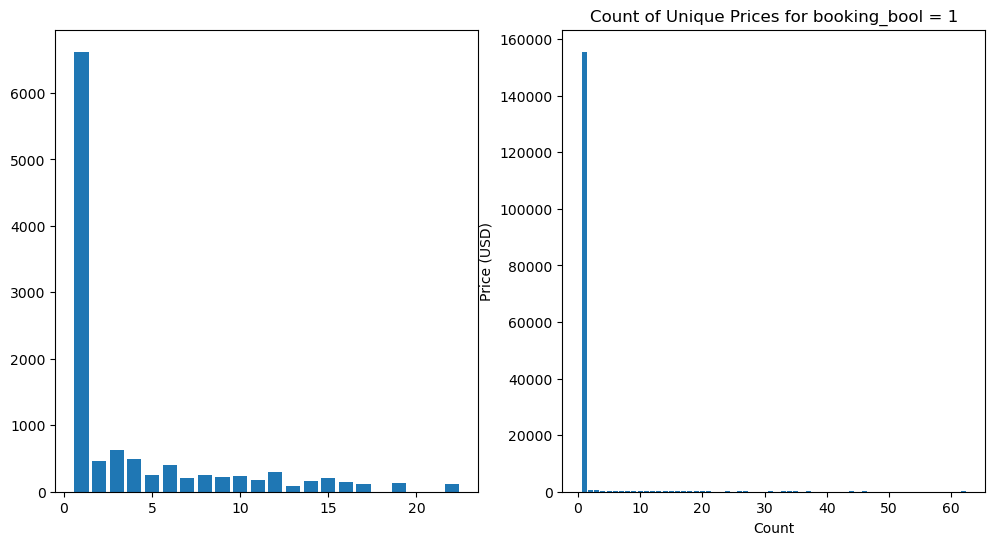

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

booking_book_l = click_bool_1[click_bool_1['booking_bool'] == 1]
booking_book_0 = click_bool_1[click_bool_1['booking_bool'] == 0]

booking_book_0_unique_prices = booking_book_0['price_usd'].value_counts()
ax1.bar(x=booking_book_0_unique_prices.values, height=booking_book_0_unique_prices.index)

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Price (USD)')
plt.title('Count of Unique Prices for booking_bool = 0')

# # Show the plot
# plt.show()

booking_book_l_unique_prices = booking_book_l['price_usd'].value_counts()
ax2.bar(x=booking_book_l_unique_prices.values, height=booking_book_l_unique_prices.index)

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Price (USD)')
plt.title('Count of Unique Prices for booking_bool = 1')

# Show the plot
plt.show()


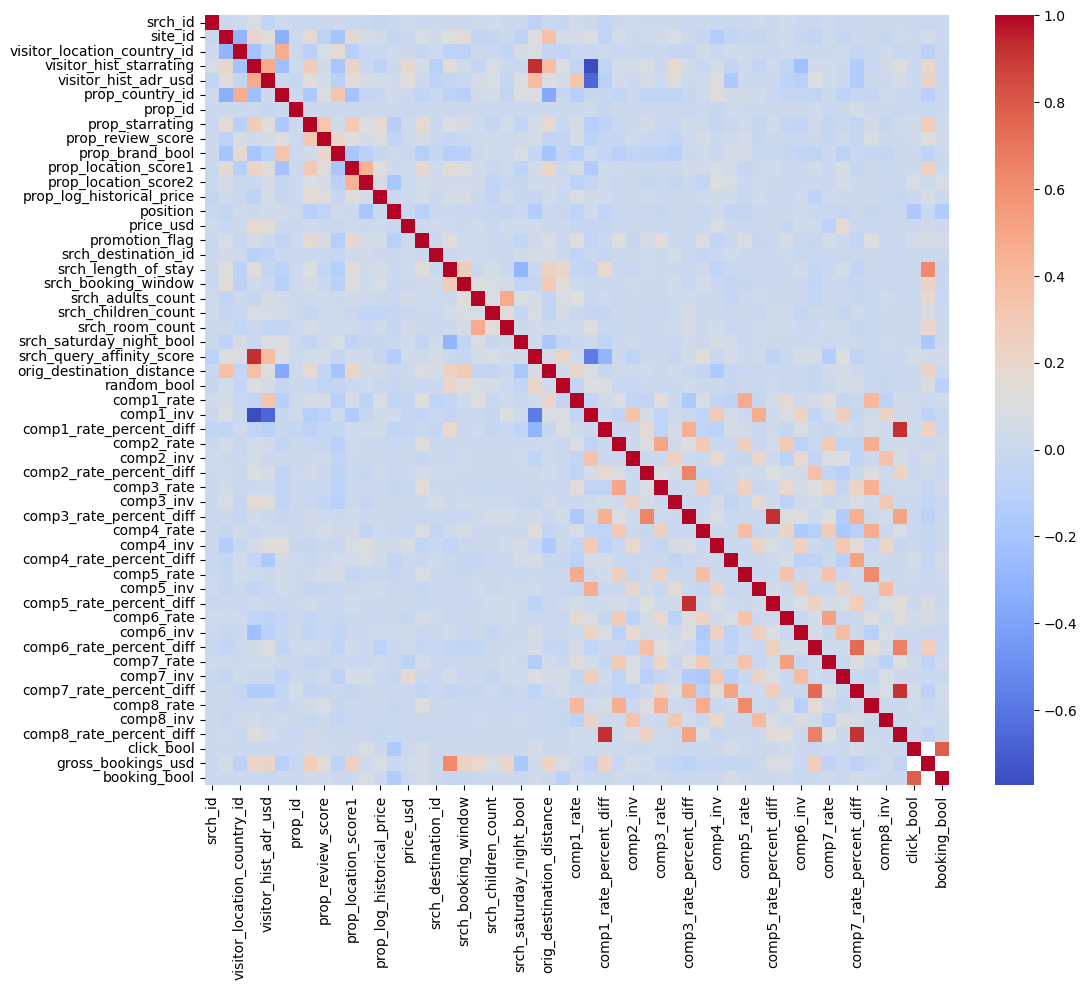

In [29]:
# Visualize the correlation between features
# Create a correlation matrix
corr = df.corr()
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))
# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', ax=ax)
# Show the plot
plt.show()

In [ ]:
# drop the features are not in the test set
new_df =df.drop(['position','click_bool','booking_bool','gross_bookings_usd'],axis=1)

# Define a list of columns to fill missing values for
columns_to_fill = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score2',
                   'srch_query_affinity_score', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 
                   'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 
                   'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 
                   'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
                   'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
                   'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff']


# Loop through each column and fill missing values with the first quartile of the respective country
for column in columns_to_fill:
    # Group the data by country and calculate the first quartile of the column
    first_quartile_by_country = round(new_df.groupby("prop_country_id")[column].quantile(0.25))
     # Fill missing values in the column with the first quartile of the respective country
    new_df[column].fillna(new_df["prop_country_id"].map(first_quartile_by_country), inplace=True)
    
    

In [ ]:
# check if still some missing values
new_df.isnull().sum()

In [ ]:
# drop the features still have a lot of missing values
new_df=new_df.drop(['comp6_rate','comp6_inv','comp6_rate_percent_diff'],axis=1)
# fill the missing values with forward filling method 
new_df = new_df.fillna(method='ffill')
new_df.isnull().sum()

In [ ]:
# perform principal component analysis to reduce the dimensionality
from sklearn.decomposition import PCA
def perform_pca(df, pca_dict, dimensions):
    for feature_set_name, feature_set in pca_dict.items():
        # Select the columns corresponding to the numeric features
        data = df[feature_set]        
        # Drop old features from the original DataFrame
        df = df.drop(columns=feature_set)        
        # Perform PCA
        pca = PCA(n_components=dimensions)
        transformed_data = pca.fit_transform(data)        
        # Create a new DataFrame with the transformed data and use the dictionary element name as column name
        new_df = pd.DataFrame(transformed_data, columns=[f"{feature_set_name}_{i+1}" for i in range(dimensions)])        
        # Concatenate the new DataFrame with the original DataFrame
        df = pd.concat([df, new_df], axis=1)    
    return df

pca_dict={'comp_rate_pca':['comp1_rate','comp2_rate','comp3_rate',
                              'comp4_rate','comp5_rate','comp7_rate','comp8_rate'],
         'comp_inv_pca':['comp1_inv','comp2_inv','comp3_inv',
                              'comp4_inv','comp5_inv','comp7_inv','comp8_inv'],
         'comp_rate_percent_diff_pca':['comp1_rate_percent_diff','comp2_rate_percent_diff','comp3_rate_percent_diff',
                              'comp4_rate_percent_diff','comp5_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff']}
new_df1= perform_pca(new_df,pca_dict,1)
new_df1.head()

In [ ]:
data = new_df1

# data = new_df
data = data.drop(['srch_id', 'site_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd'], axis=1)

# convert date_time to year, month, day, and hour
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data = data.drop('date_time', axis=1)

# # fill missing values with mean
# data['prop_review_score'] = data['prop_review_score'].fillna(data['prop_review_score'].mean())

# create new features
data['log_price_diff'] = data['prop_log_historical_price'] - np.log(data['price_usd']+1)
data['price_rank'] = data.groupby('prop_id')['price_usd'].rank(method='dense')

data['star_rank'] = data.groupby('visitor_location_country_id')['prop_starrating'].rank(method='dense', ascending=False)

# Calculate average price by country and star rating
avg_price = data.groupby(['prop_country_id', 'prop_starrating'])['price_usd'].transform('mean')
# Calculate price difference and Add price difference as a new feature
data['price_diff'] = data['price_usd'] - avg_price


# To combine the prop_location_score1 and prop_location_score2 columns to create a new feature that captures 
# the overall location score of the hotel, we can simply add these two columns
data['location_score'] = data['prop_location_score1'] + data['prop_location_score2']

print(data.shape)
data.head()

In [ ]:
x = data['location_score'].unique()
x.sort()
print(len(x))
print(x)

In [ ]:
####################################################

In [ ]:
# for balance the target classes 
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.booking_bool==0]
df_minority = df[df.booking_bool==1]

# Downsample the majority class to match the minority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,   # sample without replacement
                                   n_samples=len(df_minority),  # match number in minority class
                                   random_state=42)  # reproducible results

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Check the class distribution
print(df_balanced.booking_bool.value_counts())

In [ ]:
df_balanced.to_csv('expedia_balanced.csv', index=False)


In [ ]:
from sklearn.neighbors import NearestNeighbors

# create the user-hotel matrix
user_hotel_matrix = df.pivot_table(values='booking_bool', index='visitor_location_country_id', columns='prop_id', fill_value=0)
# create a nearest neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')

# fit the model to the user-hotel matrix
model.fit(user_hotel_matrix)

# get the nearest neighbors for a given user
user_index = 1
distances, indices = model.kneighbors(user_hotel_matrix.iloc[user_index,:].values.reshape(1, -1), n_neighbors=5)

# use the nearest neighbors to make predictions for the user
c = user_hotel_matrix.iloc[indices[0],:].mean(axis=0)

print(c)

In [ ]:
user_hotel_matrix.shape

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Get a list of all binary variables in the dataset
binary_vars = [col for col in df.columns if df[col].dtype == 'int64']

# Get a list of all continuous variables in the dataset
continuous_vars = [col for col in df.columns if df[col].dtype == 'float64']

# Calculate the point-biserial correlation coefficient for each pair of variables
results = []
# for binary_var in binary_vars:
for continuous_var in continuous_vars:
    r_pb, p_value = pearsonr(df['booking_boll'], df[continuous_var])
    results.append((binary_var, continuous_var, r_pb, p_value))

# Convert the results to a pandas DataFrame and save to a CSV file
df_results = pd.DataFrame(results, columns=['binary_var', 'continuous_var', 'r_pb', 'p_value'])
# df_results.to_csv('expedia_point_biserial_correlations.csv', index=False)

# Print the results for the top 10 correlations
top_correlations = df_results.sort_values(by='r_pb', ascending=False).head(10)
print(top_correlations)
